## 1. Paquetes/librerías a utilizar

In [1]:
import pandas as pd
import numpy as np
from matplotlib.pyplot import figure
import matplotlib.pyplot as plt

## 2. Variables constantes

In [2]:
HORAS_DIURNAS = ['H07','H08','H09','H10','H11','H12','H13','H14','H15','H16','H17','H18','H19','H20','H21','H22','H23','HoraPunta']

## 3. Carga de los datasets

In [3]:
oferta = pd.read_pickle('./datos/output/oferta.pkl')
meses_oferta = pd.read_pickle('./datos/output/meses_oferta.pkl')

In [7]:
# Durante la franja horaria de H08 hubo 1834 autobuses el día 24 de mayo de 2021.
oferta[(oferta['IdFranja']=='H08') & (oferta['FServicio']==pd.to_datetime('24/05/2021',dayfirst=True))]['Coches'].sum()

1834.0

In [8]:
# coches_dia: Suma de autobuses durante el día de FServicio de forma global en las líneas para cada franja horaria.
oferta['coches_dia'] = oferta.groupby(by=['FServicio','IdFranja'])['Coches'].transform('sum')

# media_mes_franja: Número medio de autobuses al mes de forma global en las líneas por franja horaria.
# La media_mes_franja: no hace distinción entre sí es un día laborable o festivo.
oferta['media_mes_franja'] = oferta.groupby(by=['year','month','IdFranja'])['coches_dia'].transform('mean')

# coches_mes_franjalinea: Suma de autobuses al mes-año por línea y franja horaria.
# No se si [coches_mes_franjalinea] aporta algo de valor
oferta['coches_mes_franjalinea'] = oferta.groupby(by=['year','month','CLinea','IdFranja'])[['Coches']].transform('sum')

In [10]:
oferta.loc[(oferta['IdFranja'].isin(HORAS_DIURNAS) & (oferta['TipoDiaMo']=='LA')),['IdFranja','FServicio','coches_dia','media_mes_franja','TipoDiaMo']].drop_duplicates(subset=['FServicio','IdFranja']).sort_values(by=['coches_dia'],ascending=[False])

,IdFranja,FServicio,coches_dia,media_mes_franja,TipoDiaMo
4082197,H09,2022-03-01,1894.0,1602.051048,LA
4082235,H09,2022-03-03,1890.0,1602.051048,LA
4082196,H08,2022-03-01,1890.0,1564.250389,LA
4082329,H09,2022-03-08,1888.0,1602.051048,LA
4082254,H09,2022-03-04,1888.0,1602.051048,LA
...,...,...,...,...,...
3188515,H20,2021-01-11,2.0,1190.166341,LA
3188514,H19,2021-01-11,2.0,1231.073526,LA
3188513,H18,2021-01-11,2.0,1233.858185,LA
3188512,H17,2021-01-11,2.0,1230.648445,LA


In [11]:
tmp = oferta.loc[(oferta['IdFranja'].isin(['H07','H08','H09'])&(oferta['TipoDiaMo']=='LA')),['FServicio','IdFranja','month','year','coches_dia','media_mes_franja']].copy()
# 'CLinea','Elinea','Denominacion',

In [12]:
tmp['coches_dia'] = tmp.groupby(by=['FServicio']).coches_dia.transform('mean')
tmp['media_mes_franja'] = tmp.groupby(by=['month','year']).coches_dia.transform('mean')
tmp = tmp.assign(IdFranja='HoraPunta',TipoDiaMo='LA').drop_duplicates(subset=['FServicio','IdFranja'])
tmp.sort_values(by=['coches_dia'],ascending=[False])

,FServicio,IdFranja,month,year,coches_dia,media_mes_franja,TipoDiaMo
4082195,2022-03-01,HoraPunta,3,2022,1816.492091,1793.414591,LA
4082233,2022-03-03,HoraPunta,3,2022,1813.808436,1793.414591,LA
4082327,2022-03-08,HoraPunta,3,2022,1813.451670,1793.414591,LA
4082346,2022-03-09,HoraPunta,3,2022,1811.757469,1793.414591,LA
4082214,2022-03-02,HoraPunta,3,2022,1811.135325,1793.414591,LA
...,...,...,...,...,...,...,...
642554,2019-12-13,HoraPunta,12,2019,465.016293,1473.177924,LA
2582129,2021-01-14,HoraPunta,1,2021,458.666667,1627.555260,LA
2582109,2021-01-13,HoraPunta,1,2021,419.666667,1627.555260,LA
2611733,2021-01-12,HoraPunta,1,2021,276.927711,1627.555260,LA


In [29]:
LINEAS_RITA = ['27', '14', '19', '40', '70', '74', '175', '178', 'T61']

# Líneas con mayor afluencia de pasajeros
Según este tweet de [@EMTmadrid](https://twitter.com/emtmadrid/status/956855958369701889?lang=es) las líneas con mayor demanda en 2017 son: L34, L27, L70, C1, C2, L31, L28, L35 y L17.

La demanda de estas líneas supone un 26.5% del total, equivalente 113 millones de pasajeros en dicho año.

In [ ]:
numero_viajeros = pd.read_csv('datos/output/numero_viajeros.csv')
aclaraciones = pd.read_csv('datos/output/aclaraciones_ocupacion_lineas.csv')

In [ ]:
ranking = numero_viajeros.iloc[:,:3].copy()

In [ ]:
for year in range(2014,int(numero_viajeros.columns[-1])):
    rank = numero_viajeros.loc[:,['Código',str(year)]].sort_values(by=[str(year)], ascending=False)
    rank[str(year)] = rank.reset_index().index+1
    # numero_viajeros[str(year)].sort_values(ascending=False).reset_index().rename(columns={'index':'Código'})
    ranking = ranking.merge(rank)

In [ ]:
# Debería cambiar este tipo de tabla por una que fueran las filas los años y las columnas el top10. De esa forma conseguiría mostrar siempre las 10 líneas para cada año y no como se muestra ahora que son las 10 líneas más usadas en el último año (2021).

ranking.sort_values(by='2021').iloc[0:10,:]

,Código,Etiqueta,Denominación,2014,2015,2016,2017,2018,2019,2020,2021
32,34,34,PLAZA DE CIBELES - LAS AGUILAS,2,2,2,1,1,1,1,1
68,70,70,PLAZA DE CASTILLA - ALSACIA,5,5,5,3,3,3,2,2
25,27,27,GLORIETA DE EMBAJADORES - PLAZA DE CASTILLA,1,1,1,2,2,2,3,3
67,69,C2,CIRCULAR 2 -,4,4,4,5,5,5,6,4
66,68,C1,CIRCULAR 1 -,3,3,3,4,4,4,5,5
29,31,31,PLAZA MAYOR - ALUCHE,6,6,6,6,7,8,7,6
26,28,28,PUERTA DE ALCALA - BARRIO DE CANILLEJAS,8,8,9,8,8,7,8,7
19,21,21,PASEO DEL PINTOR ROSALES - BARRIO EL SALVADOR,7,7,7,7,6,6,4,8
33,35,35,PLAZA MAYOR - CARABANCHEL ALTO,9,9,8,9,9,9,9,9
128,138,138,PLAZA DE CRISTO REY - COLONIA SAN IGNACIO DE L...,61,58,60,54,38,29,11,10


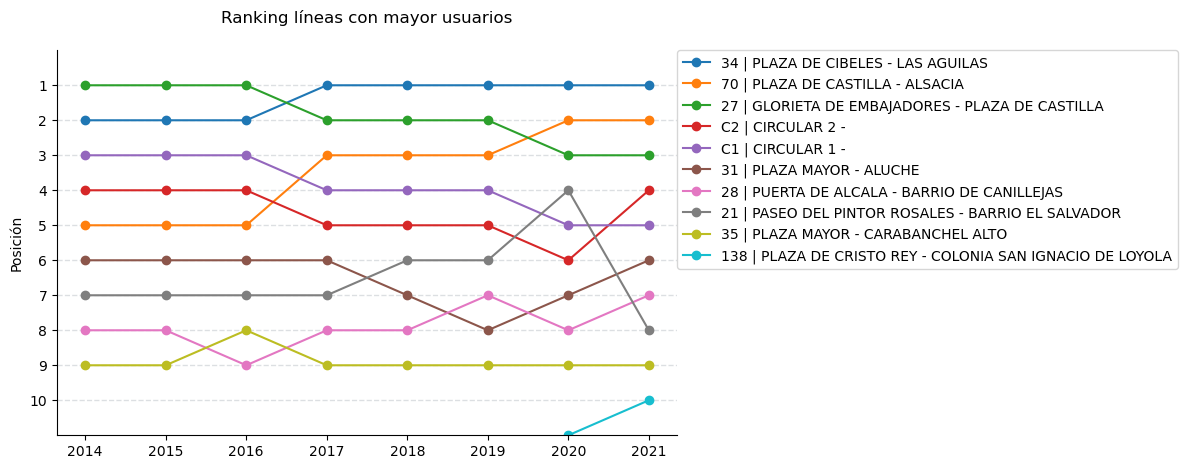

In [ ]:
data = ranking.sort_values(by='2021').iloc[0:10,:].reset_index(drop=True)

fig, axes = plt.subplots(figsize=(8, 5),dpi=100)
axes.spines.right.set_visible(False)
axes.spines.top.set_visible(False)

# Visualizo los datos (avg_coches) y fechas

years = ranking.columns[3:]
axes.plot(years,data.iloc[:,3:].T.values,'-o',label=data['Etiqueta'] + ' | ' +data['Denominación'])

# # Título y nombre ejes
# axes.set_xlabel('Años')
axes.set_ylabel('Posición')
axes.set_title(label=f'Ranking líneas con mayor usuarios',pad=20)
   
axes.set_xticks(range(0,len(years)))
axes.set_xticklabels(years)
axes.set_ylim(0,11)
axes.set_yticks(range(1,11))
axes.invert_yaxis()

axes.grid(color="#172a3d", linestyle='--', linewidth=1, axis='y', alpha=0.15)
axes.legend(bbox_to_anchor=(1, 1), loc=2, borderaxespad=0,)
fig.set_facecolor('white')
plt.show()

## Aclaraciones

|    |   Año | Informacion                                                                                 |
|---:|------:|:--------------------------------------------------------------------------------------------|
|  0 |  2019 | (1)  El Servicio Especial 721 solo funciona los días de evento en el Estadio Metropolitano. |
|  1 |  2019 | (2)  El 1 de abril de 2019 el Servicio Especial 722 se transforma en la línea 166.          |
|  2 |  2020 | (1)  El Servicio Especial 721 solo funciona los días de evento en el Estadio Metropolitano. |
|  3 |  2020 | (2)  El 18 de febrero se crea la línea 361.                                                 |
|  4 |  2020 | (3)  El 3 de marzo de 2020 la línea 602 se prolonga y se transforma en la línea 362.        |
|  5 |  2020 | (4)  El 16 de marzo de 2020 el Servicio Especial 723 se transforma en la línea 159.         |
|  6 |  2020 | (5)  El Servicio Especial 710 funciona del 23 de marzo al 24 de mayo de 2020.               |
|  7 |  2020 | (6)  El 15 de septiembre se crea la línea 363.                                              |
|  8 |  2020 | (7)  El 7 de octubre se crea el Servicio Especial 712.                                      |
|  9 |  2021 | (1)  El Servicio Especial 721 solo funciona los días de evento en el Estadio Metropolitano. |
| 10 |  2021 | (2)  El 16 de febrero se crea la línea 167.                                                 |
| 11 |  2021 | (3)  El 2 de marzo se crea la línea 163.                                                    |
| 12 |  2021 | (4)  El 17 de marzo se crea la línea 405.                                                   |
| 13 |  2021 | (5)  El 1 de septiembre se crea el Servicio Especial 708.                                   |


## Servicios Especiales (SE) --> Habituales

Además, hay otras aclaraciones que no se contemplan como el cambio de `Servicio Especial` a  `Regular` de la línea con tramo `MAR DE CRISTAL - VALDEBEBAS`. Pero eso no siempre es así, en ocasiones 2 líneas pueden tener el mismo nombre pero realizar trayectos diferentes.

Este puede ser el caso de las líneas `22` y `79` que reciben en ambos caso la denominación de _`PLAZA DE LEGAZPI - VILLAVERDE ALTO`_

In [ ]:
numero_viajeros['Denominación'].value_counts().to_frame()[numero_viajeros['Denominación'].value_counts().to_frame().rename(columns={'Denominación':'count'})['count']==2]

,Denominación
ALSACIA - HOSPITAL RAMON Y CAJAL,2
PLAZA DE CIBELES - PALOMERAS,2
PUERTA DE TOLEDO - ARGÜELLES,2
MAR DE CRISTAL - VALDEBEBAS,2
PLAZA DE LEGAZPI - VILLAVERDE ALTO,2
BARAJAS - HOSPITAL RAMON Y CAJAL,2
PLAZA MAYOR - VILLAVERDE CRUCE,2
MONCLOA - ARAVACA,2
PLAZA DE CASTILLA - BARRIO DE PEÑAGRANDE,2


In [ ]:
numero_viajeros[numero_viajeros['Denominación']=="PLAZA DE LEGAZPI - VILLAVERDE ALTO"]

,Código,Etiqueta,Denominación,2014,2015,2016,2017,2018,2019,2020,2021,2022
20,22,22,PLAZA DE LEGAZPI - VILLAVERDE ALTO,1870951,1780063,1848495,1853754,2090211,2250369,1202753,1492295,746364
77,79,79,PLAZA DE LEGAZPI - VILLAVERDE ALTO,1034255,1085020,1148193,1162509,1205486,1226949,758516,958153,463169


In [ ]:
numero_viajeros[numero_viajeros['Denominación']=="MAR DE CRISTAL - VALDEBEBAS"]

,Código,Etiqueta,Denominación,2014,2015,2016,2017,2018,2019,2020,2021,2022
155,171,171,MAR DE CRISTAL - VALDEBEBAS,0,0,484127,471277,595458,704949,478455,663449,324996
268,799,SE,MAR DE CRISTAL - VALDEBEBAS,92731,337471,0,0,0,0,0,0,0


In [ ]:
columnas_calculo = dict()

for year in range(int(numero_viajeros.columns[3:].min()),int(numero_viajeros.columns[3:].max())+1,1):
    columnas_calculo[str(year)] = 'sum'

numero_viajeros.groupby(by=['Denominación']).agg({**columnas_calculo,**{'Denominación':'count'}}).rename(columns={'Denominación':'count'}).sort_values(by='count',ascending=False)


In [ ]:
lineas_espciales = numero_viajeros[numero_viajeros['Código']>=700][['Código','Etiqueta','Denominación']].reset_index(drop=True)
lineas_habituales = numero_viajeros[numero_viajeros['Código']<700][['Código','Etiqueta','Denominación']].reset_index(drop=True)

In [ ]:
print(f'Lineas habituales: {len(lineas_habituales["Denominación"])} / Líneas SE: {len(lineas_espciales["Denominación"])} / Diferencia: {len(set(lineas_habituales["Denominación"])-set(lineas_espciales["Denominación"]))}')

Lineas habituales: 217 / Líneas SE: 52 / Diferencia: 208


In [ ]:
lineas_habituales.join(other=lineas_espciales.set_index('Denominación'),on=['Denominación'],rsuffix='_SE',how='inner')

,Código,Etiqueta,Denominación,Código_SE,Etiqueta_SE
151,165,165,ALSACIA - HOSPITAL RAMON Y CAJAL,720,SE
152,166,166,BARAJAS - HOSPITAL RAMON Y CAJAL,722,SE
155,171,171,MAR DE CRISTAL - VALDEBEBAS,799,SE


In [ ]:
numero_viajeros['media'] = numero_viajeros.iloc[:,3:].apply(lambda x: x.mean(),axis=1)
numero_viajeros['media_sin_2022'] = numero_viajeros.iloc[:,3:11].apply(lambda x: x.mean(),axis=1)

numero_viajeros.sort_values(by='2021',ascending=False)

,Código,Etiqueta,Denominación,2014,2015,2016,2017,2018,2019,2020,2021,2022,media,media_sin_2022
32,34,34,PLAZA DE CIBELES - LAS AGUILAS,7840818,7984636,8363237,8575908,8496485,8986303,5167825,6650128,3432417,7.325556e+06,7758167.500
68,70,70,PLAZA DE CASTILLA - ALSACIA,7122258,7129357,7252981,7508617,7286532,7677360,4416674,5228237,2714421,6.303886e+06,6702752.000
25,27,27,GLORIETA DE EMBAJADORES - PLAZA DE CASTILLA,8902761,8767669,8916906,8269113,7750416,8230803,3970651,4795961,2428158,6.948255e+06,7450535.000
67,69,C2,CIRCULAR 2 -,7278401,7239262,7442740,7003394,6686799,6926192,3581783,4483508,2357121,5.932913e+06,6330259.875
66,68,C1,CIRCULAR 1 -,7478016,7333224,7483436,7161191,6832968,6989959,3605080,4434154,2359257,6.009170e+06,6414753.500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
241,732,SE,PUERTA DE ARGANDA - SAINZ DE BARANDA,0,8268,0,0,331646,0,0,0,0,3.823997e+04,42489.250
107,117,117,ALUCHE - COLONIA SAN IGNACIO DE LOYOLA,1008768,1001468,979882,906343,1111297,832268,0,0,0,6.569968e+05,730003.250
243,737,SE,LEGAZPI - LAGUNA,0,0,0,0,0,0,0,0,28,2.800234e+00,0.000
244,739,SE,POZUELO - HOSPITAL ENFERMERA ISABEL ZENDAL,0,0,0,0,0,0,0,0,8076,8.076674e+02,0.000


In [ ]:
numero_viajeros[numero_viajeros['Etiqueta']=='SE']

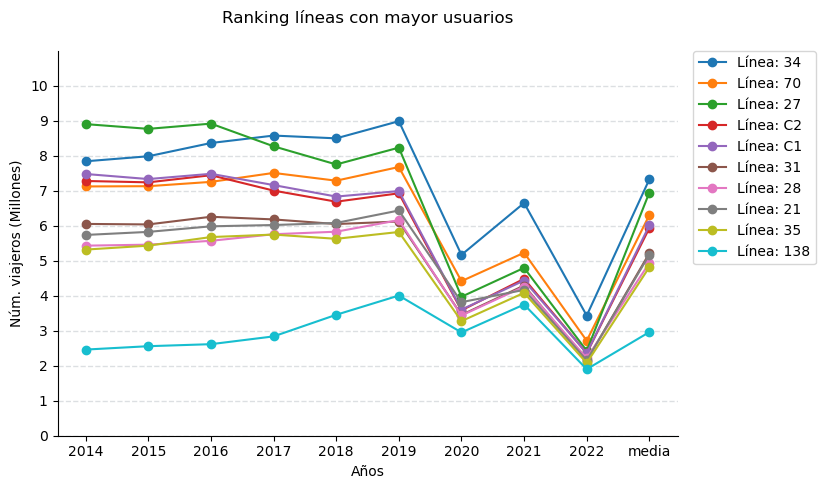

In [ ]:
fig, axes = plt.subplots(figsize=(8, 5),dpi=100)

# Ocultar boordes del gráfico
axes.spines.right.set_visible(False)
axes.spines.top.set_visible(False)

# Visualización de los datos
years = numero_viajeros.columns[3:-1].values
axes.plot(years,numero_viajeros.sort_values(by='2021',ascending=False).iloc[0:10,3:-1].apply(lambda x: x/(10**6)).T.values,'-o',label='Línea: '+data['Etiqueta'])

# Rejilla
axes.grid(color="#172a3d", linestyle='--', linewidth=1, axis='y', alpha=0.15)

# Título y nombre de los ejes
axes.set_xlabel('Años')
axes.set_ylabel('Núm. viajeros (Millones)')
axes.set_title(label=f'Ranking líneas con mayor usuarios',pad=20)



# axes.set_xticks(range(0,len(years)))
# axes.set_xticklabels(years)

# Pasamos a decimal los datos (/10^6) para poder mostrarlos en formato decimal de millones 
y_max = round(max(numero_viajeros.sort_values(by='2021',ascending=False).iloc[:,3:-1].max().apply(lambda x: x/(10**6)).to_list()))
axes.set_ylim(0,y_max+2)
axes.set_yticks(range(0,y_max+2))

# Leyenda y fondo en blanco del gráfico
axes.legend(bbox_to_anchor=(1.025, 1), loc=2, borderaxespad=0)
fig.set_facecolor('white')
plt.show()
plt.close()